In [1]:
from lib.utils import *
from lib.models import *
from tqdm import tqdm
from torch import nn

/home/andrew/.local/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
window_size = 101
trainloader,devloader,_ = load_data_cv(foldi=0)
device = 'cuda'
model = MLP(window_size=window_size).to(device=device)
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters())
params = sum([p.flatten().size()[0] for p in list(model.parameters())])
print("Params: ",params)

Params:  653501


100%|██████████| 10/10 [05:50<00:00, 35.03s/it]


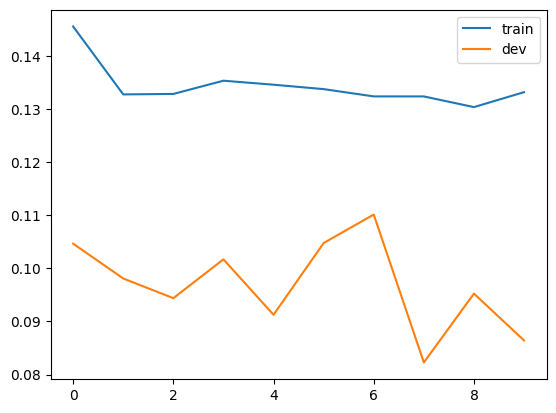

In [3]:
loss_tr = []
loss_dev = []
pbar = tqdm(range(10))

for epoch in pbar:
    # train loop
    model.train()
    loss_tr_total = 0
    for (X_tr,y_tr) in trainloader:
        X_tr,y_tr = X_tr.to(device),y_tr.to(device)
        logits = model(X_tr)
        loss = criterion(logits,y_tr)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        loss_tr_total += loss.item()
    loss_tr.append(loss_tr_total/len(trainloader))

    # dev loop
    model.eval()
    loss_dev_total = 0
    for (X_dv,y_dv) in devloader:
        X_dv,y_dv = X_dv.to(device),y_dv.to(device)
        logits = model(X_dv)
        loss = criterion(logits,y_dv)
        loss_dev_total += loss.item()
    loss_dev.append(loss_dev_total/len(devloader))
plt.plot(loss_tr,label='train')
plt.plot(loss_dev,label='dev')
plt.legend()

100%|██████████| 1044/1044 [00:00<00:00, 2044.73it/s]


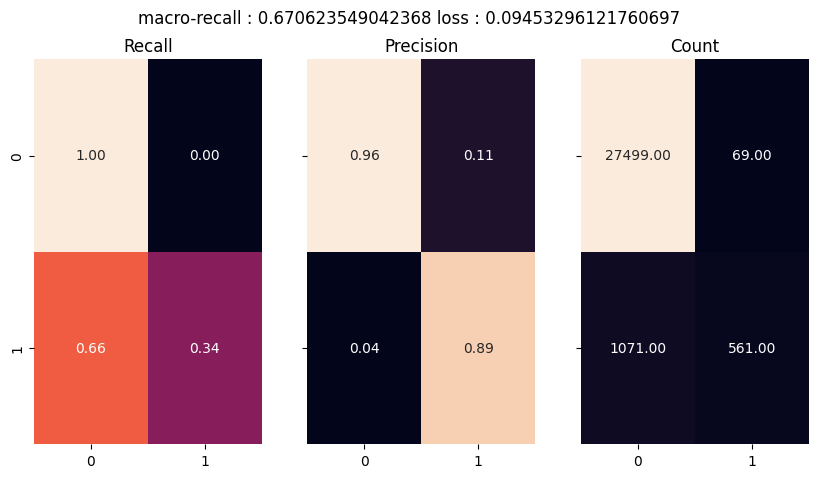

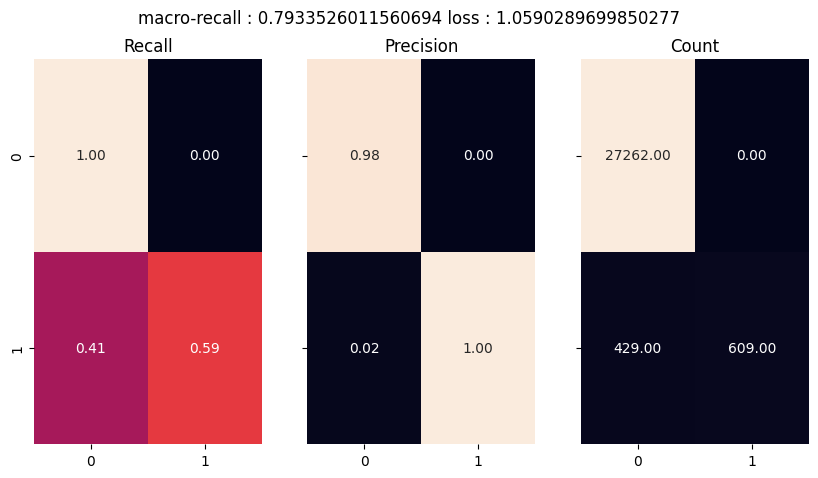

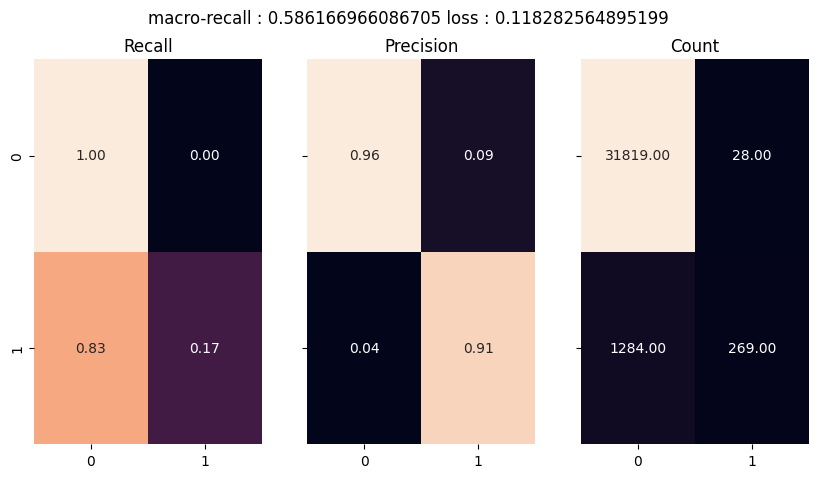

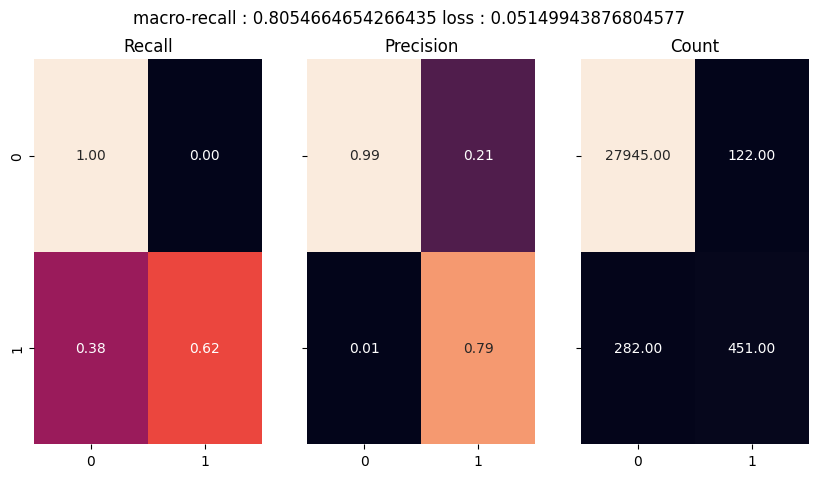

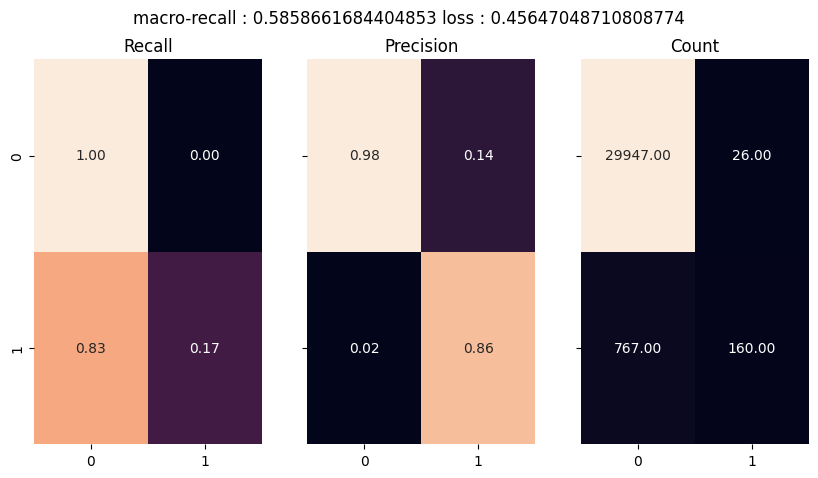

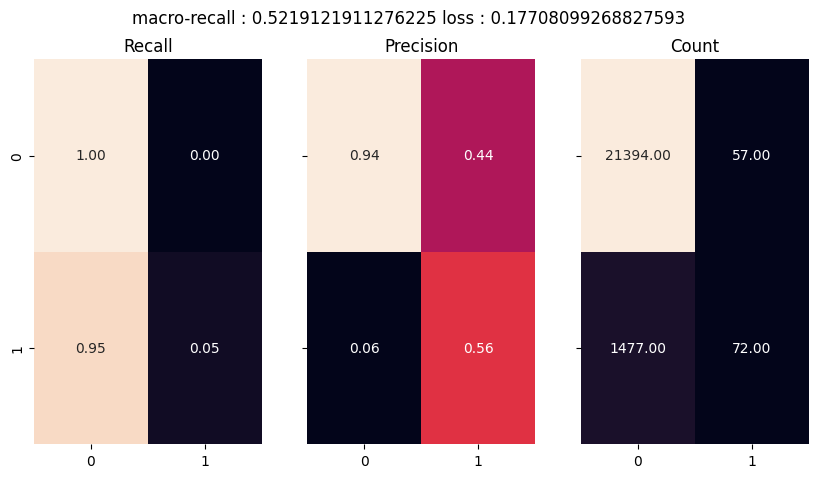

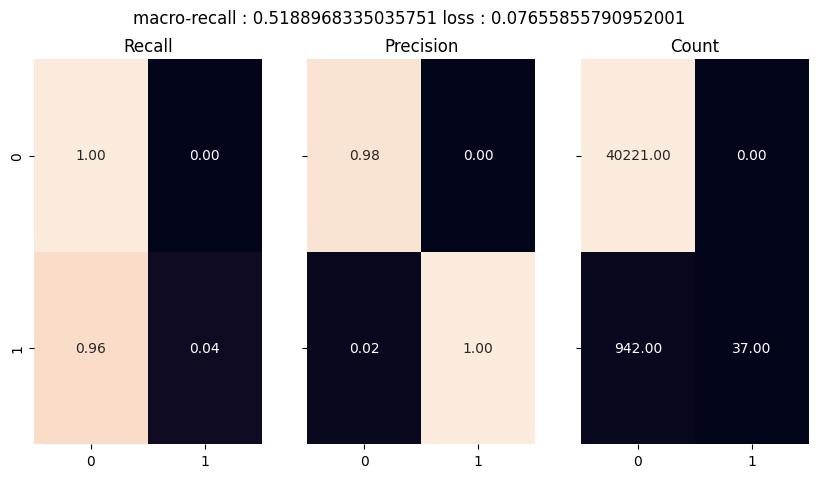

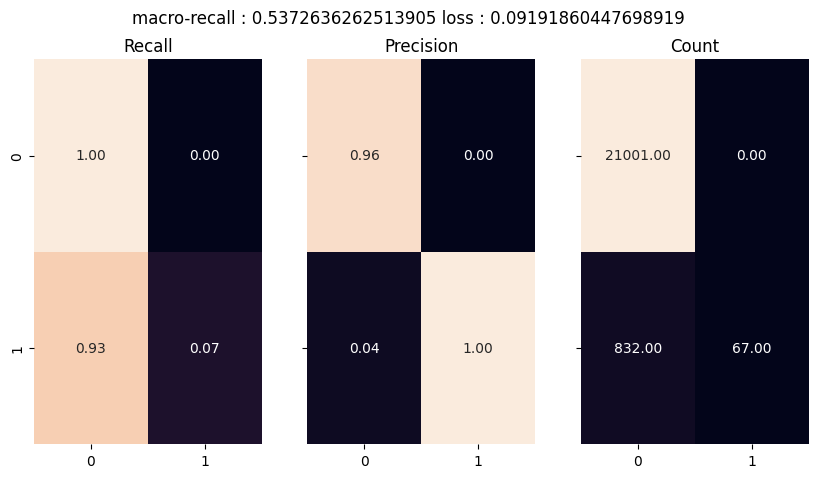

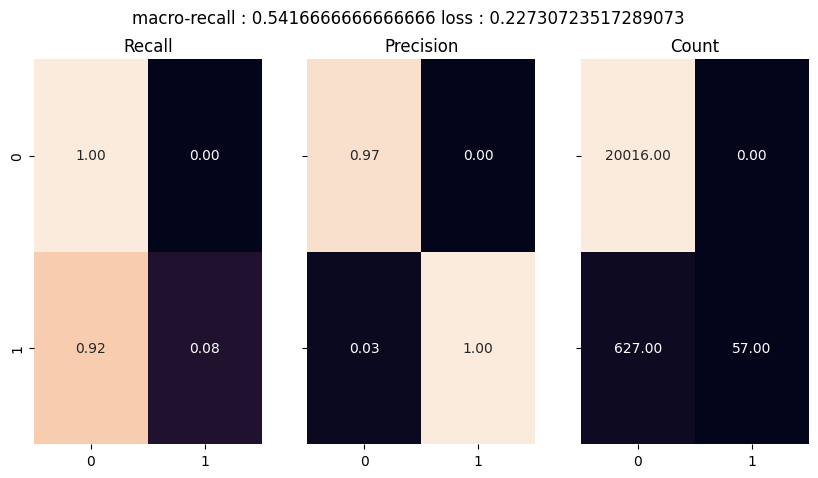

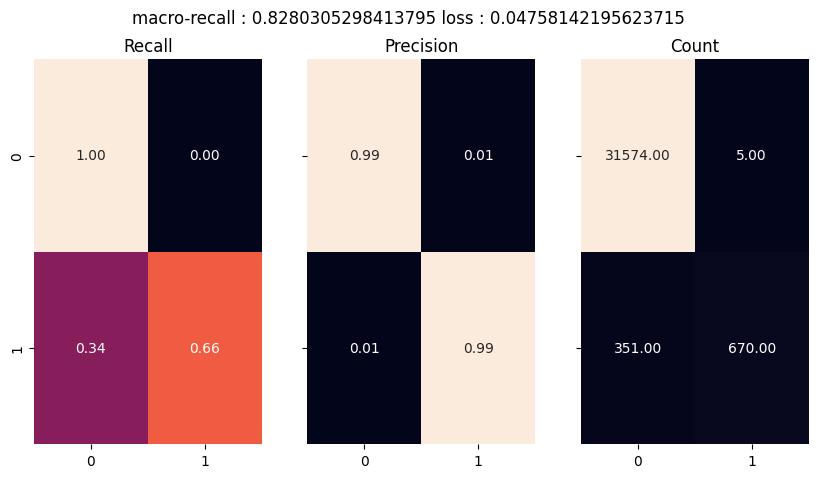

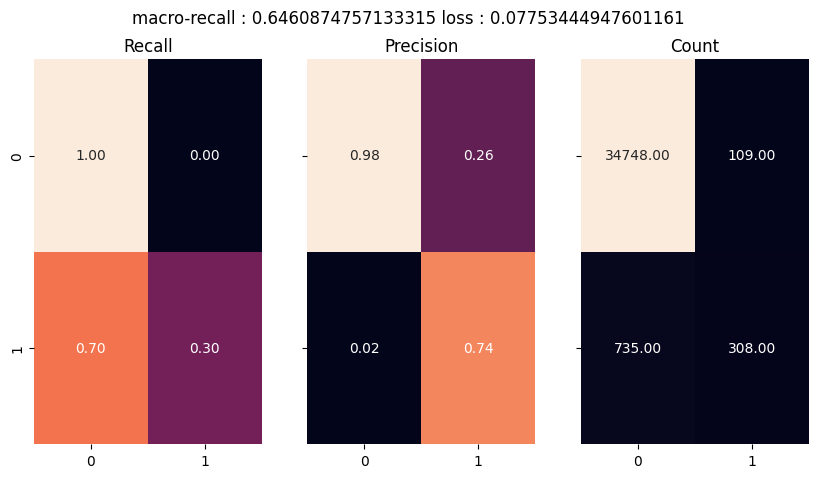

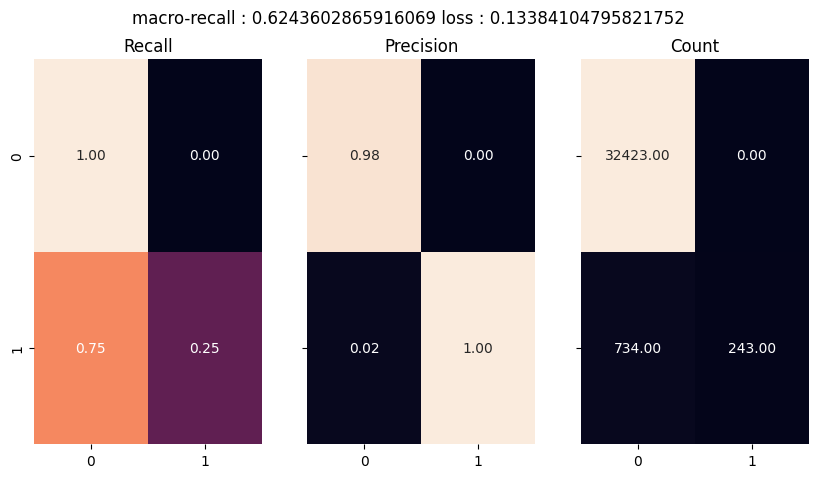

In [4]:
from sklearn.metrics import f1_score,recall_score,precision_score
f1i = []
recalli = []
precisioni = []
for idx in test_idx:
    X,y = load_and_window_nursing_list([idx])
    loss,y_true,y_pred = test_evaluation(DataLoader(TensorDataset(X,y),batch_size=32,shuffle=True),model,criterion,plot=True)
    f1i.append(f1_score(y_true=y_true,y_pred=y_pred.round(),average='macro'))
    recalli.append(recall_score(y_true=y_true,y_pred=y_pred.round(),average='macro'))
    precisioni.append(precision_score(y_true=y_true,y_pred=y_pred.round(),average='macro'))

tensor(0.6383, dtype=torch.float64)
tensor(0.1137, dtype=torch.float64)


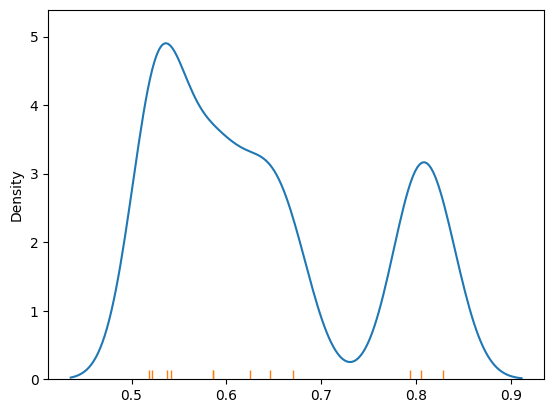

In [5]:
sns.kdeplot(recalli,bw_adjust=.4)
sns.rugplot(recalli)
print(torch.tensor(recalli).mean()) #.4958
print(torch.tensor(recalli).std()) #.0063

tensor(0.6828, dtype=torch.float64)
tensor(0.1302, dtype=torch.float64)


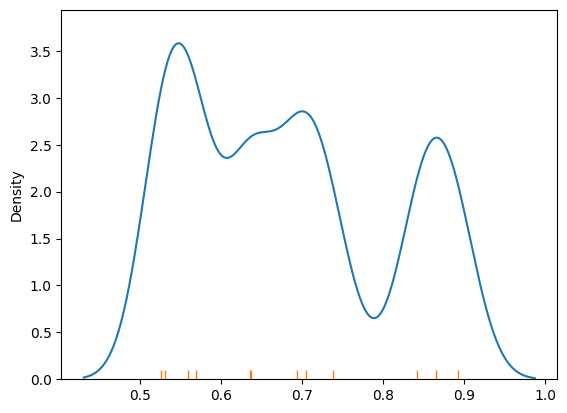

In [6]:
sns.kdeplot(f1i,bw_adjust=.4)
sns.rugplot(f1i)
print(torch.tensor(f1i).mean()) #.4958
print(torch.tensor(f1i).std()) #.0063

tensor(0.9332, dtype=torch.float64)
tensor(0.0741, dtype=torch.float64)


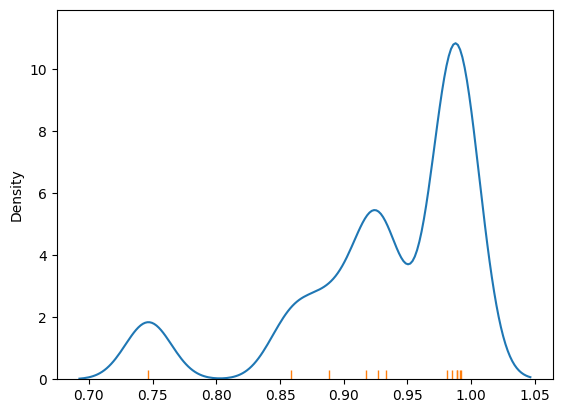

In [7]:
sns.kdeplot(precisioni,bw_adjust=.4)
sns.rugplot(precisioni)
print(torch.tensor(precisioni).mean()) #.4958
print(torch.tensor(precisioni).std()) #.0063

100%|██████████| 11229/11229 [00:05<00:00, 1897.15it/s]


0.6995763582828951
0.6338066687883823
0.9335291857752724


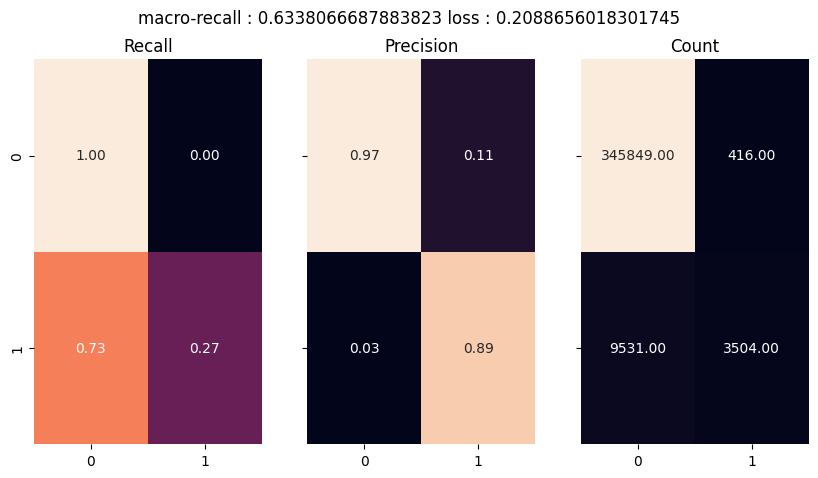

In [8]:
from sklearn.metrics import f1_score,recall_score,precision_score
X,y = load_and_window_nursing_list(test_idx)
loss,y_true,y_pred = test_evaluation(DataLoader(TensorDataset(X,y),batch_size=32,shuffle=True),model,criterion,plot=True)
print(f1_score(y_true=y_true,y_pred=y_pred.round(),average='macro'))
print(recall_score(y_true=y_true,y_pred=y_pred.round(),average='macro'))
print(precision_score(y_true=y_true,y_pred=y_pred.round(),average='macro'))